In [ ]:
#imports
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#load dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#data cleaning, making the job_posting_date a datetime object
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])



In [ ]:
df_us = df[df['job_country'] == "United States"].copy()
df_us['job_posted_month'] = df_us["job_posted_date"].dt.strftime('%B')


In [ ]:
df_us_pivot = df_us.pivot_table(index='job_posted_month',columns='job_title_short', aggfunc="size")
df_us_pivot.reset_index(inplace=True)
df_us_pivot['month_no'] = pd.to_datetime(df_us_pivot['job_posted_month'], format='%B').dt.month
df_us_pivot.sort_values(by='month_no', inplace=True)
df_us_pivot.set_index('job_posted_month', inplace=True)



Text(0.5, 0, 'Month')

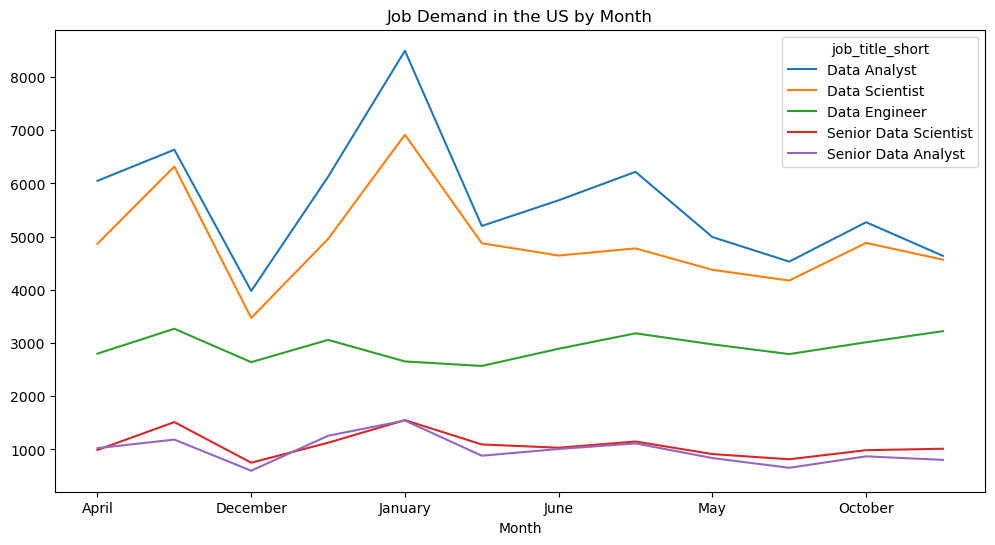

In [112]:
top_5 = df_us.value_counts('job_title_short').head(5)
top_5 = top_5.index.to_list()
df_us_pivot[top_5]
df_us_pivot
df_us_pivot[top_5].plot(kind='line', figsize=(12,6))
plt.title("Job Demand in the US by Month")
plt.xlabel("Month")